In [13]:
import pandas as pd
from matplotlib import gridspec
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

In [14]:
df = pd.read_csv("world_series_2023.csv")

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_strikezone(ax):
    # Set axis labels and limits
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(0, 4)
    ax.set_xlabel("Horizontal Location")
    ax.set_ylabel("Vertical Location")

    # Draw the strike zone using line segments
    strikezone_segments = [
        [-0.83083, 1.52166, 0.83083, 1.52166, 2, 'black'],
        [-0.83083, 3.67333, 0.83083, 3.67333, 2, 'black'],
        [-0.83083, 1.52166, -0.83083, 3.67333, 2, 'black'],
        [0.83083, 1.52166, 0.83083, 3.67333, 2, 'black'],
    ]

    for x1, y1, x2, y2, lw, color in strikezone_segments:
        ax.plot([x1, x2], [y1, y2], linewidth=lw, color=color)

    # Draw home plate using line segments
    homeplate_segments = [
        [-0.83083, 0.175, -0.83083, 0.3, 1.5, 'black'],
        [0.83083, 0.175, 0.83083, 0.3, 1.5, 'black'],
        [-0.83083, 0.3, 0.83083, 0.3, 1.5, 'black'],
        [0, 0, 0.83083, 0.175, 1.5, 'black'],
        [0, 0, -0.83083, 0.175, 1.5, 'black'],
    ]

    for x1, y1, x2, y2, lw, color in homeplate_segments:
        ax.plot([x1, x2], [y1, y2], linewidth=lw, color=color)

    # Fix aspect ratio
    ax.set_aspect(0.75)
    # Apply 'void' theme to remove axes, ticks, labels, and spines
    ax.axis('off')



In [18]:
def plot_pitches_on_strikezone(pitch_data = df):
    game_pk_data_filtered = pitch_data.loc[(((pitch_data['prediction'] >= .25) & (pitch_data['is_strike'] == 0)) | ((pitch_data['prediction'] <= .75) & (pitch_data['is_strike'] == 1)))]
    # Group data by catcher name
    grouped = game_pk_data_filtered.groupby('mlb_name')
    home_team = pitch_data['home_team'].iloc[0]
    away_team = pitch_data['away_team'].iloc[0]
    date = pitch_data['game_date'].iloc[0]
    # Fixed strike zone top and bottom in the plot
    plot_sz_top = 3.67333
    plot_sz_bot = 1.52166
    
    # Create subplots
    num_catchers = len(grouped)
    # Use GridSpec for more complex layout
    gs = gridspec.GridSpec(1, num_catchers + 1, width_ratios=[1]*num_catchers + [0.1], wspace=.1)  # adjust wspace
    fig = plt.figure(figsize=(6*num_catchers, 8))
    fig.suptitle(f'   {away_team} vs {home_team} \n 2023 World Series', y=0.96, fontsize=18, weight='bold', ha='center')
    axs = [plt.subplot(gs[i]) for i in range(num_catchers)]

    for ax, (name, group) in zip(axs, grouped):
        total_framing_runs = group['framing_runs'].sum().round(3)
        plot_strikezone(ax)
        group['new_plate_z'] = plot_sz_bot + ((group['plate_z'] - group['sz_bot']) / (group['sz_top'] - group['sz_bot'])) * (plot_sz_top - plot_sz_bot)
        continuous_values = group['probability_added']
        sc = ax.scatter(group['plate_x'], group['new_plate_z'], c=continuous_values, s = 75, cmap='RdBu_r', marker='o', alpha = .9)
        ax.set_title(f"Catcher: {name} \n(Total Framing Runs: {total_framing_runs})", y=.9750, fontsize=14)

    # Create an axis for the colorbar on the right of the last subplot
    colorbar_ax = plt.subplot(gs[-1])
    cbar = plt.colorbar(sc, cax=colorbar_ax)
    cbar.set_label('Strike Probability Added', size=14, labelpad=-60)
    cbar.ax.set_position([0.87, 0.41, 0.01, 0.37]) # [left, bottom, width, height]

    plt.show()

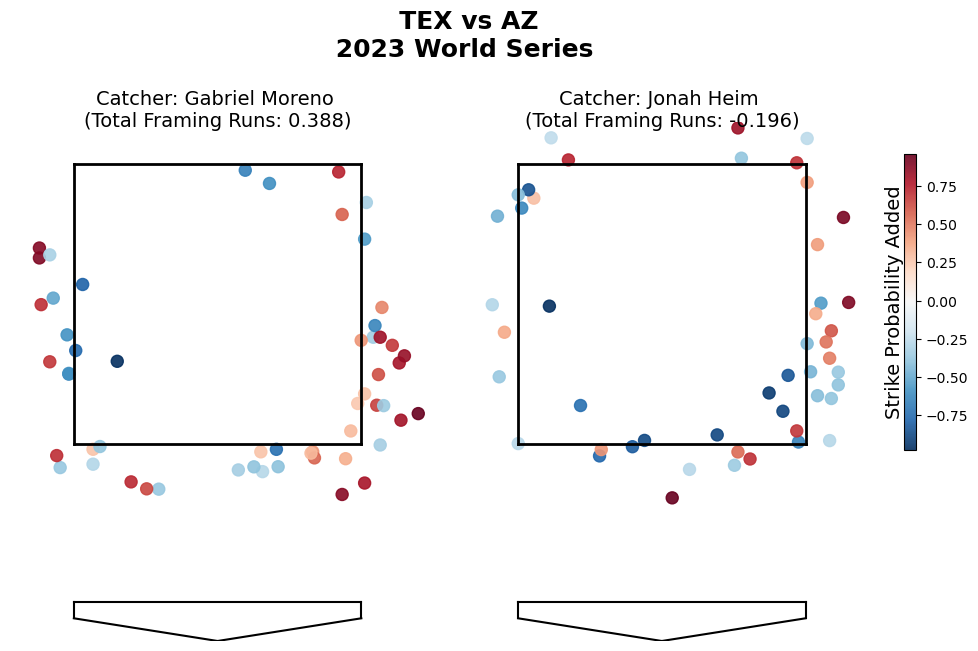

In [20]:
plot_pitches_on_strikezone(df)